<h1>CS4619: Artificial Intelligence 2</h1>
<h2>OLS Linear Regression using Gradient Descent</h2>
<h3>
    Derek Bridge<br>
    School of Computer Science and Information Technology<br>
    University College Cork
</h3>

# Initialization $\newcommand{\Set}[1]{\{#1\}}$ $\newcommand{\Tuple}[1]{\langle#1\rangle}$ $\newcommand{\v}[1]{\pmb{#1}}$ $\newcommand{\cv}[1]{\begin{bmatrix}#1\end{bmatrix}}$ $\newcommand{\rv}[1]{[#1]}$

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression

<h1>OLS Regression using Gradient Descent</h1>
<p>
    A reminder: we have a training set containing $m$ examples, each having $n$ features. We have 
    represented the training set as an $m \times(n+1)$ matrix $\v{X}$: each row is one of the examples;
    each column is one of the features; but all the values in the first column (which we designate column 0)
    are set to 1. Each hypothesis is a linear equation, $h_{\v{\beta}}(\v{x}) = \v{\beta}_0\v{x}_0 +
    \v{\beta}_1\v{x}_1 + \ldots + \v{\beta}_n\v{x}_n$. We are trying to find a 
    $(n+1)$-dimensional vector $\v{\beta}$ of parameters that minimise
    the loss function $J(\v{\beta}) = \frac{1}{2m}\sum_{i=1}^m(h_{\v{\beta}}(\v{x}^{(i)}) - \v{y}^{(i)})^2$. 
</p>
<p>
    In the previous lecture, we saw that one approach is to set the gradient of the loss function to zero 
    and to solve for $\v{\beta}$, giving what is called the normal equation. In this lecture, we take a 
    different approach: we <em>search</em> for the $\v{\beta}$ that minimises the loss function.
</p>
<p>
    Conceptually, this approach works as follows:
</p>
<ul>
    <li>
         It starts with an initial guess &mdash; e.g. choose each $\v{\beta}_j$ randomly or set each to zero
    </li>
    <li>
        It computes $J(\v{\beta})$ &mdash; the total error for this hypothesis on the training set
    </li>
    <li>
        And it repeats: it chooses another $\v{\beta}$ &mdash; one for which $J(\v{\beta})$ is smaller
    </li>
    <li>
        It keeps doing this until $J(\v{\beta})$ <b>converges</b> &mdash; changes to $\v{\beta}$ do not result
        in smaller $J(\v{\beta})$
    </li>
</ul>
<p>
    So the key to this algorithm is how it comes up with new parameter values, $\v{\beta}$.
</p>

<h1>Gradient Descent</h1>
<p>
    <b>Gradient descent</b> is a <em>general</em> method for finding parameters $\v{\beta}$ that minimize some
    function $J_{\v{\beta}}$. The idea is to repeatedly make small changes to the values of the parameters that
    lead to the greatest immediate decrease in the value of $J(\v{\beta})$. The algorithm is as follows: 
</p>
<ul style="background: lightgrey; list-style: none">
    <li>
        repeat
        <ul>
            <li>
                <em>simultaneously</em> update all $\v{\beta}_j$ as follows:<br />
                $\v{\beta}_j \gets \v{\beta}_j - \alpha\frac{\partial J(\v{\beta})}{\partial\v{\beta}_j}$
            </li>
        </ul>
        until convergence
     </li>
</ul>
<p>
    $\alpha$ is called the <b>learning rate</b> and it controls the size of the changes that we make.
</p>

<h2>The Importance of Simultaneous Update</h2>
<p>
    It's important that the updates to the $\v{\beta}_j$ are done simultaneously, not one after the other. 
    We will see how to achieve this using vectorization. The alternative, if you want to stick with a more
    conventional programming style, is to use the following statements:
</p>
<ul style="background: lightgrey">
    <li>
        $\v{\delta}_0 \gets \frac{\partial J(\v{\beta})}{\partial\v{\beta}_0}$<br />
        $\v{\delta}_1 \gets \frac{\partial J(\v{\beta})}{\partial\v{\beta}_1}$<br />
        $\vdots$<br />
        $\v{\delta}_n \gets \frac{\partial J(\v{\beta})}{\partial\v{\beta}_n}$<br />
        <br />
        $\v{\beta}_0 \gets \v{\beta}_0 - \alpha\v{\delta}_0$<br />
        $\v{\beta}_1 \gets \v{\beta}_1 - \alpha\v{\delta}_1$<br />
        $\vdots$<br />
        $\v{\beta}_n \gets \v{\beta}_n - \alpha\v{\delta}_n$<br />
    </li>
</ul>
<p>
    A student reads the above, takes no notice, and simply implements the algorithm with the following 
    <em>sequence</em> of statements:
</p>
<ul style="background: lightgrey">
    <li>
        $\v{\beta}_0 \gets \v{\beta}_0 - \alpha\frac{\partial J(\v{\beta})}{\partial\v{\beta}_0}$<br />
        $\v{\beta}_1 \gets \v{\beta}_1 - \alpha\frac{\partial J(\v{\beta})}{\partial\v{\beta}_1}$<br />
        $\vdots$<br />
        $\v{\beta}_n \gets \v{\beta}_n - \alpha\frac{\partial J(\v{\beta})}{\partial\v{\beta}_n}$<br />
    </li>
</ul>
<p>
    What's the difference?
</p>

<h2>Further Questions</h2>
<p>
    Some further questions that we will discuss in the lecture:
</p>
<ul>
    <li>
        Why do these update rules, using derivatives, make intuitive sense. (We will explain this with
        a diagram in which we plot $J_{\beta}$ on the vertical axis and just one of the parameters on
        the horizontal axis. We will consider separately the case where the gradient is positive and where
        it is negative and we will see how the update rules move us towards a minimum.)
    </li>
    <li>
        In practice, how will we define convergence?
    </li>
    <li>
        What is the role of the learning rate, $\alpha$?
        <ul>
            <li>
                What if the value of $\alpha$ is 'too small'?
            </li>
            <li>
                What if the value of $\alpha$ is 'too large'?
            </li>
            <li>
                Some people suggest a variant of the algorithm in which the value of $\alpha$ is decreased
                over time, i.e. its value in later iterations is smaller. Why do they suggest this? And why
                isn't it necessary?
            </li>
        </ul>
    </li>
    <li>
        What happens if $J_{\v{\beta}}$ isn't convex?
    </li>
</ul>

<h1>Gradient Descent for OLS Linear Regression</h1>
<p>
    All that we need to apply this general algorithm to our specific scenario is to plug in the partial
    derivative of our definition of $J_{\beta}$. We want this:
    $$\frac{\partial\frac{1}{2m}\sum_{i=1}^m(h_{\v{\beta}}(\v{x}^{(i)}) - \v{y}^{(i)})^2}{\partial\v{\beta}_j}$$
    which is
    $$\frac{1}{m}\sum_{i=1}^m(h_{\v{\beta}}(\v{x}^{(i)}) - \v{y}^{(i)}) \times \v{x}_j^{(i)}$$
</p>
<p>
    So we now get gradient descent for OLS linear regression:
</p>
<ul style="background: lightgrey; list-style: none">
    <li>
        repeat
        <ul>
            <li>
                <em>simultaneously</em> update $\v{\beta}_j$  as follows:<br />
                $\v{\beta}_j \gets \v{\beta}_j - 
                    \alpha\frac{1}{m}\sum_{i=1}^m(h_{\v{\beta}}(\v{x}^{(i)}) - \v{y}^{(i)}) \times \v{x}_j^{(i)}$
            </li>
        </ul>
        until convergence
     </li>
</ul>

<h2>Gradient Descent for OLS Linear Regression</h2>
<p>
    Watch out for the vectorized implementation of the simultaneous update rules!
</p>

In [4]:
def J(beta, X, y):
    """
    Loss function for OLS regression
    """
    h = X.dot(beta)
    differences = h.flatten() - y
    sq_differences = differences ** 2
    return (1.0 / (2 * y.size)) * sq_differences.sum()

def gds_for_ols_linear_regression(X, y, alpha, num_iterations):
    """
    Gradient descent search for OLS linear regression.
    alpha is the learning rate.
    num_iterations is the numer of updates - instead of a better definition of convergence.
    It returns parameters beta and also a numpy array of size num_iterations, containing
    the value of the loss function, J, after each iteration - so you can plot it.
    """

    Jvals = np.zeros(num_iterations)
    m, n = X.shape
    beta = np.zeros(n)
    
    for iter in range(num_iterations):
        beta -= (1.0 * alpha / m) * (X.dot(beta) - y).dot(X)
        Jvals[iter] = J(beta, X, y)
 
    return beta, Jvals

<h2>Running the Code</h2>
<p>
    We'll run it on the Cork property dataset but, for reasons that we will discuss in a later lecture, I'm
    going to leave out the floor area feature.
</p>

In [5]:
# Use pandas to read the CSV file
df = pd.read_csv("dataset-corkA.csv")

# Insert the extra feature (all ones)
df.insert(loc=0, column='ones', value=1)

# Get the feature-values and the target values into separate numpy arrays of numbers
X = df[['ones', 'bdrms', 'bthrms']].values
y = df['price'].values

# Run the GDS
beta, Jvals = gds_for_ols_linear_regression(X, y, alpha = 0.03, num_iterations = 4000)

# Display beta
beta

array([-57.66816632,  49.06247762,  91.69181718])

<p>
    So, using just those two features ($\v{x}_2$ and $\v{x}_3$, the number of bedrooms and bathrooms resp.)
    and a learning rate of 0.03, after 4000 iterations, the model we have learned is
    $$y = -57.67 + 49.06\v{x_2} + 91.69\v{x_3}$$
</p>

<h3>Sanity Check</h3>
<p>
    It's a good idea to plot the values of the loss function against the number of iterations. If its value
    ever increases, then
</p>
<ul>
    <li>
        the code might be incorrect (I think it's OK!)
    </li>
    <li>
        the value of $\alpha$ is too big and is causing divergence
    </li>
</ul>
<p>
    So let's do that:
</p>

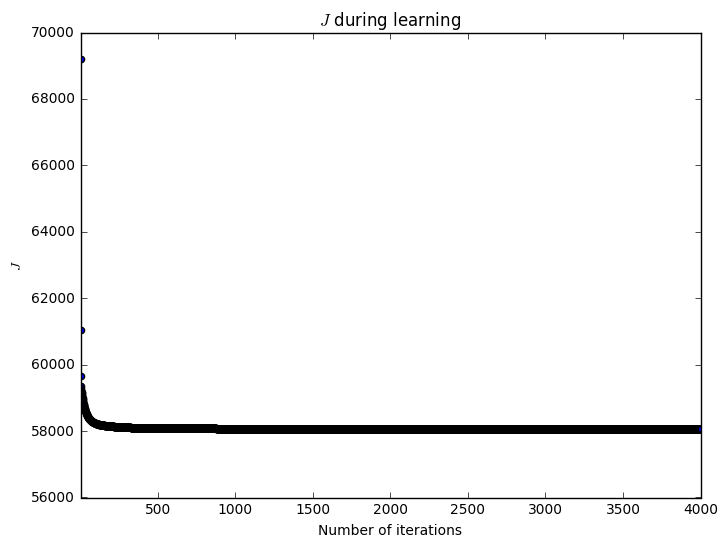

In [6]:
fig = plt.figure(figsize=(8,6))
plt.title("$J$ during learning")
plt.xlabel("Number of iterations")
plt.xlim(1, Jvals.size)
plt.ylabel("$J$")
plt.ylim(56000, 70000)
xvals = np.linspace(1, Jvals.size, Jvals.size)
plt.scatter(xvals, Jvals)
plt.show()

<h1>Stochastic Gradient Descent</h1>
<p>
    The algorithm we have presented is sometimes called <b>batch gradient descent</b>. On every iteration,
    for every parameter, it computes the loss function over <em>all</em> the examples in the training set.
    Even with a highly optimized vectorized implementation, this may not scale well to very, very large 
    training sets. If there are hundreds of millions of examples, say, then they may not even fit in main
    memory, in which case they have to be repeatedly read in from disk.
</p>
<p>
    An alternative is <b>stochastic gradient descent</b> (or 'incremental gradient descent'). It looks at
    each example in turn, and modifies the parameters $\v{\beta}$ on the basis of that individual example.
    Here's the pseudocode:
</p>
<ul style="background: lightgrey; list-style: none">
    <li>
        repeat
        <ul>
            <li>for $i \gets 1$ to $m$
                <ul>
                    <li>
                        <em>simultaneously</em> update $\v{\beta}_j$  as follows:<br />
                        $\v{\beta}_j \gets \v{\beta}_j - 
                        \alpha(h_{\v{\beta}}(\v{x}^{(i)}) - \v{y}^{(i)}) \times \v{x}_j^{(i)}$
                    </li>
                </ul>
            </li>
        </ul>
        until convergence
     </li>
</ul>
<p>
    Because it is not guided by the <em>global</em> minimum, some of the individual parameter updates taken in
    stochastic gradient descent may not reduce the loss function: its 'journey' towards convergence may be
    less direct. On the other hand, if you use it only when you have massive training sets, stochastic
    gradient descent might actually take fewer iterations (of the outermost loop) than you require for
    typical uses of batch gradient descent.
</p>

<h1>OLS Linear Regression: Normal Equation vs Gradient Descent</h1>
<p>
    Gradient Descent is such an important algorithm in machine learning and AI in general, that it was worth
    studying it. Numerous machine learning algorithms make use of it.
</p>
<p>
    But, for OLS linear regression, you probably wouldn't use it. The normal equation gives a much more direct
    method. Here's a comparison of the two:
</p>
<ul>
    <li>
        Gradient Descent requires that we choose a learning rate, $\alpha$; 
        the normal equation does not.
    </li>
    <li>
        Gradient Descent requires a definition of convergence; the normal equation does not.
    </li>
    <li>
        Gradient Descent can have problems with convergence when different features have very different
        ranges of values: see the discussion of feature scaling in an upcoming lecture. These problems do not 
        arise with the normal equation.
    </li>
    <li>
        But Gradient Descent can handle large numbers of features; you might prefer it if the number of 
        features $n$ is very large (several thousand, say). The normal equation does not scale so well to
        very large numbers of features: $(\v{X}^T\v{X})$ is $n \times n$ (where $n$ is the number of features)
        and the typical algorithms for computing matrix inverses (or pseudo-inverses) are cubic in $n$ 
        (and even the algorithms with better complexity are all more than quadratic). Inverting a matrix with 
        tens of thousands of features can be too slow.
    </li>
    <li>
        Gradient Descent is a general method for minimizing a  loss function: it crops up across a wide
        range of learning algorithms. (This is why we studied it!) By contrast, the normal equation is 
        specific to linear regression.
    </li>
</ul>

<h2>There's No Need To Roll Your Own!</h2>
<p>
    Let's make one final point by way of conclusion: of course, you don't need to implement either of these linear
    regression methods yourself!
    A good library such as Python's scikit-learn algorithm will give you a method for doing it. You've
    already seen it done. But here it is again (and I'll use the same two features as above, for comparison):
</p>

In [7]:
# Use pandas to read the CSV file
df = pd.read_csv("dataset-corkA.csv")

# Get the feature-values and the target values into separate numpy arrays of numbers
X = df[['bdrms', 'bthrms']].values
y = df['price'].values

# Create linear regression object
estimator = LinearRegression()

# Train the model using the data
estimator.fit(X, y)

# Print the parameters that it learns
print('Intercept: ', estimator.intercept_)
print('Coefficients: ', estimator.coef_)

Intercept:  -57.6684429697
Coefficients:  [ 49.06255205  91.69181314]
